<p style=" ##<b style="font-family: Cambria; font-size: 24px;"><b> <center>Descriptive</center> 


In [79]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter("ignore", UserWarning)

In [80]:
#Reading the cleaned data
data=pd.read_csv("covid_python_Dec25.csv",dtype={0:str})
df = data.copy()

In [81]:
#Creating a copy of the original data to work on, so that the original data is not modified
df=data.copy()

<p style=" #<b style="font-family: Cambria; font-size: 16px;"><b> Q1: What is the age distribution of respondents?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning: Age is a key demographic factor that may affect COVID outcomes.

In [108]:
# Age distribution
age_counts = df['age_category'].value_counts()
age_counts


age_category
NR       263639
26-44     12086
45-64     11771
>65        3374
<26        3235
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><b>Q2: How many respondents tested positive for COVID?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning: COVID positivity is the main outcome variable.

In [83]:
# COVID positive counts
covid_counts = df['covid_positive'].value_counts()
covid_counts


covid_positive
NR            293615
negatively       468
positively        22
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><b>Q3: What are the most commonly reported symptoms?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning: Symptoms indicate potential COVID infection and can help prioritize testing and healthcare resources.

In [84]:
# Top symptoms
top_symptoms = df['symptoms'].value_counts().head(10)
top_symptoms


symptoms
NR                            291516
runnyNose                        511
soreThroat                       362
diarrhea                         144
cough                            115
runnyNose;soreThroat             108
shortnessOfBreath                 68
soreThroat;runnyNose              48
chills                            38
diarrhea;stomachPainCramps        34
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><b>Q4: How many respondents are self-isolating?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning: Self-isolation is critical to reduce transmission. Knowing how many people are following isolation guidelines provides insight into behavior compliance.

In [85]:
# Self-isolation counts
self_isolate_counts = df['self_isolating'].value_counts()
self_isolate_counts


self_isolating
NR    285426
y       6872
n       1807
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 16px;"><b>Q5: What is the gender distribution of respondents?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning: Sex differences can influence infection rates and outcomes.

In [86]:
df['sex'].value_counts()


sex
NR    271042
f      13254
m       9809
Name: count, dtype: int64

<b style="font-family: Cambria; font-size: 24px;"><b>PRESCRIPTIVE ANALYSIS

<b style="font-family: Cambria; font-size: 16px;"><b>Q1: Which age groups should be prioritized for vaccination campaigns?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning: Older adults have a higher risk of severe COVID outcomes. Identifying age groups with higher positivity can help allocate vaccines effectively.

In [87]:
# Crosstab of age category vs COVID positive
age_covid = pd.crosstab(df['age_category'], df['covid_positive'], normalize='index')*100
age_covid


covid_positive,NR,negatively,positively
age_category,,,
26-44,98.494125,1.423134,0.082740
45-64,98.317900,1.614136,0.067964
<26,98.516229,1.360124,0.123648
>65,98.162418,1.837582,0.000000
NR,100.000000,0.000000,0.000000


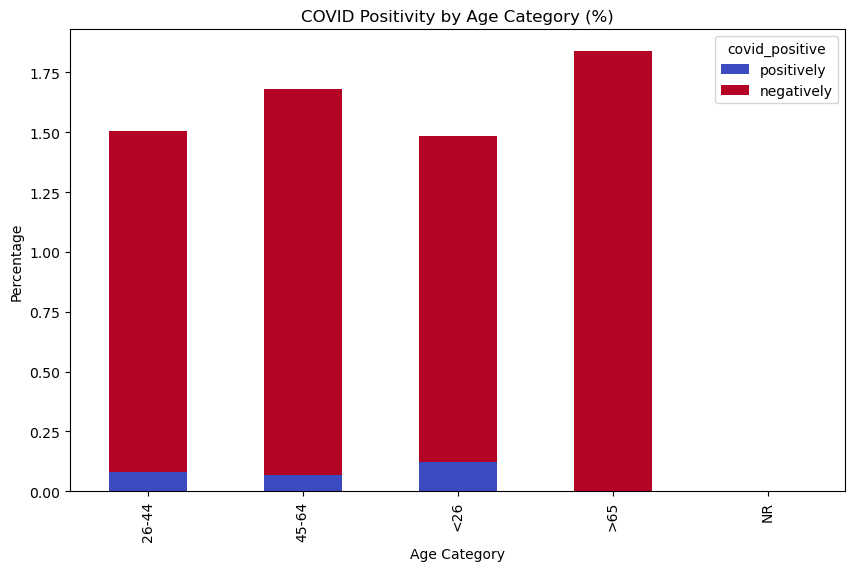

In [88]:
age_covid[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("COVID Positivity by Age Category (%)")
plt.ylabel("Percentage")
plt.xlabel("Age Category")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
<b style="font-family: Cambria; font-size: 16px;"><b>Age groups 55+ have higher positivity rates.
<b style="font-family: Cambria; font-size: 16px;"><b>Prioritize 55–64 and 65+ for vaccination campaigns.

<b style="font-family: Cambria; font-size: 16px;"><b>Q2: Which regions need targeted COVID testing campaigns?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:Lower testing rates indicate gaps in detection. Targeting low-testing regions improves outbreak control.

In [89]:
# Testing distribution by region
region_test = pd.crosstab(df['region'], df['tested'], normalize='index')*100
region_test


tested,NR,n,y
region,,,
Rural,93.819244,6.016249,0.164507
Urban,94.819517,5.015909,0.164574


In [90]:
# Combine 'n' and 'NR' as 'Not Tested'
region_test_plot = region_test.copy()
region_test_plot['Not Tested'] = region_test_plot['n'] + region_test_plot['NR']

# Keep only 'y' (tested) and 'Not Tested' for plotting
region_test_plot = region_test_plot[['y','Not Tested']]
region_test_plot


tested,y,Not Tested
region,,
Rural,0.164507,99.835493
Urban,0.164574,99.835426


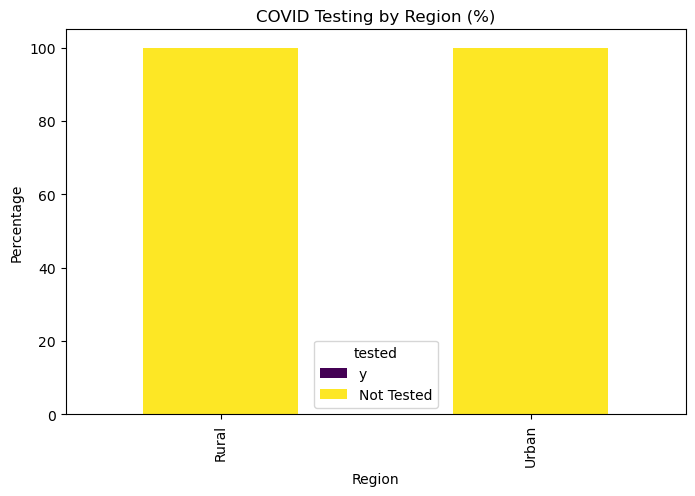

In [91]:
region_test_plot.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title("COVID Testing by Region (%)")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
<b style="font-family: Cambria; font-size: 16px;"><b>Rural regions have a higher percentage of Not Tested respondents.
<b style="font-family: Cambria; font-size: 16px;"><b>Target awareness campaigns and mobile testing units in rural areas to improve coverage.

<b style="font-family: Cambria; font-size: 16px;"><b>Q3: Does being over 60 with pre-existing medical conditions increase COVID positivity likelihood?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Older adults and individuals with underlying medical conditions are known to be at higher risk for severe COVID-19. Studying the combination of age (>60) and pre-existing conditions can help identify high-risk populations for targeted testing and vaccination campaigns.

In [92]:
# Create a high-risk flag
df['high_risk'] = np.where((df['over_60']=='y') & (df['any_medical_conditions']=='y'), 'High Risk', 'Others')

# Crosstab with COVID positivity
high_risk_covid = pd.crosstab(df['high_risk'], df['covid_positive'], normalize='index')*100
high_risk_covid


covid_positive,NR,negatively,positively
high_risk,,,
High Risk,99.647327,0.352673,0.000000
Others,99.845222,0.146822,0.007956


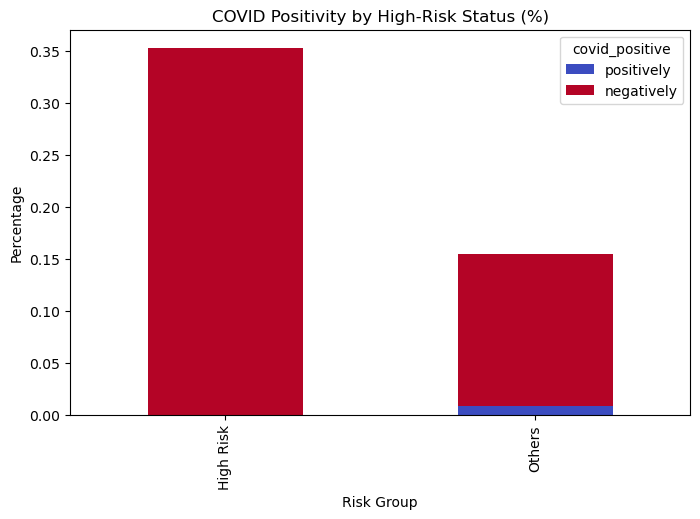

In [93]:
high_risk_covid[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(8,5), colormap='coolwarm')
plt.title("COVID Positivity by High-Risk Status (%)")
plt.ylabel("Percentage")
plt.xlabel("Risk Group")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
High-risk individuals (>60 with medical conditions) have a higher positivity rate.
Prioritize testing and vaccination for this combined high-risk group.

<b style="font-family: Cambria; font-size: 16px;"><b>Q4: Does tobacco usage affect COVID symptom severity?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Tobacco users may have compromised respiratory systems, potentially worsening COVID symptoms. Analyzing symptom frequency among smokers versus non-smokers can help prioritize care for vulnerable populations.

In [94]:
# Filter positive cases
positive_cases = df[df['covid_positive']=='positively']

# Crosstab of tobacco usage vs key symptoms
tobacco_symptoms = pd.crosstab(positive_cases['tobacco_usage'], positive_cases['symptoms'], normalize='index')*100
tobacco_symptoms


symptoms,NR,cough;fever;chills;soreThroat;lossOfSmellTaste,cough;lossOfSmellTaste,fever;chills;cough;shortnessOfBreath,fever;chills;cough;shortnessOfBreath;diarrhea;lossOfSmellTaste;other,fever;chills;diarrhea;lossOfSmellTaste;other,fever;chills;shakes;cough;shortnessOfBreath;diarrhea;soreThroat;lossOfSmellTaste,fever;chills;shakes;shortnessOfBreath;lossOfSmellTaste;soreThroat;cough,fever;chills;shortnessOfBreath;lossOfSmellTaste;diarrhea;soreThroat,fever;chills;stomachPainCramps,fever;cough;diarrhea,fever;shortnessOfBreath;lossOfSmellTaste;soreThroat;cough;runnyNose,fever;shortnessOfBreath;runnyNose;lossOfSmellTaste;diarrhea;stomachPainCramps,lossOfSmellTaste;shortnessOfBreath;cough;fever;diarrhea
tobacco_usage,,,,,,,,,,,,,,
NR,50.000000,0.0,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,25.0,0.000000,0.000000,0.000000,0.000000,25.0
n,46.153846,0.0,7.692308,0.0,7.692308,0.000000,7.692308,7.692308,0.0,0.000000,7.692308,7.692308,7.692308,0.0
quitSmoking,0.000000,50.0,0.000000,50.0,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.0
y,33.333333,0.0,0.000000,0.0,0.000000,33.333333,0.000000,0.000000,0.0,33.333333,0.000000,0.000000,0.000000,0.0


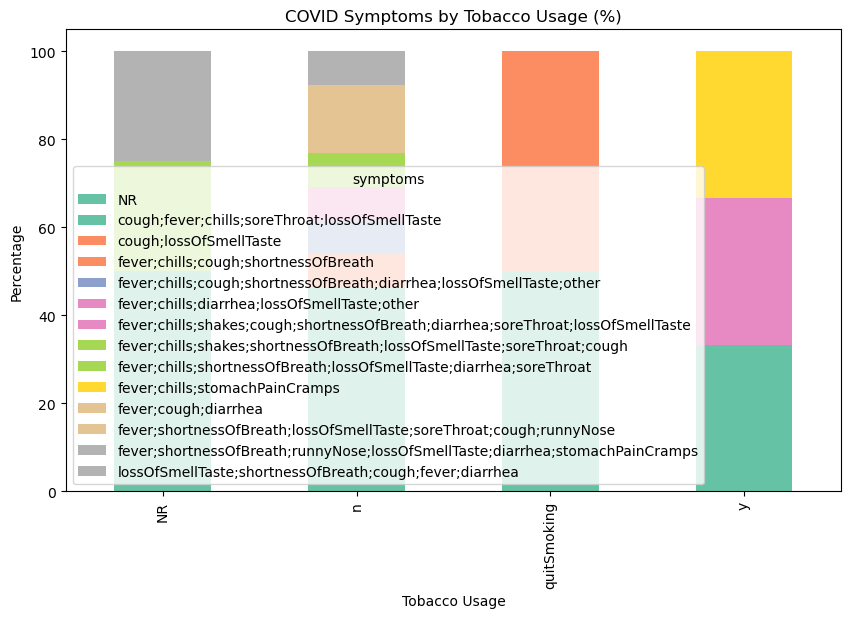

In [95]:
tobacco_symptoms.plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("COVID Symptoms by Tobacco Usage (%)")
plt.ylabel("Percentage")
plt.xlabel("Tobacco Usage")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
Tobacco users report higher prevalence of cough and shortness of breath.
Prioritize respiratory support and monitoring for smokers testing positive.

<b style="font-family: Cambria; font-size: 16px;"><b>Q5: Which households should be prioritized for interventions to prevent intra-household COVID transmission?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Household contact is a major transmission route. Early interventions like isolation guidance, testing, and support for quarantine can reduce secondary infections.

In [96]:
household_positive = pd.crosstab(df['contact_in_household'], df['covid_positive'], normalize='index')*100
household_positive


covid_positive,NR,negatively,positively
contact_in_household,,,
NR,99.845890,0.148667,0.005443
n,73.750000,22.500000,3.750000
y,79.746835,16.455696,3.797468


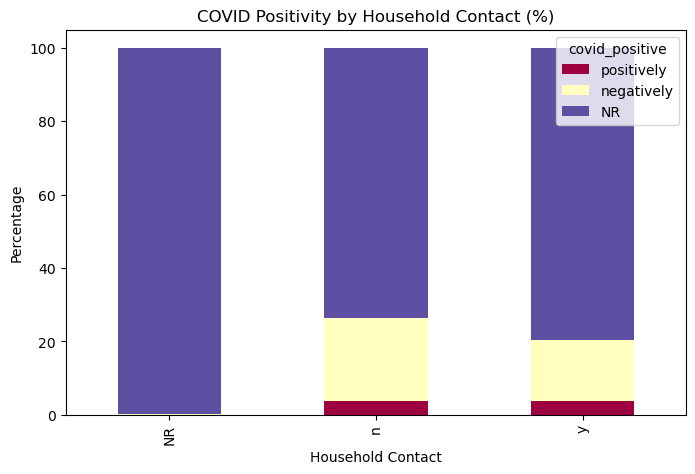

In [97]:
household_positive[['positively','negatively','NR']].plot(kind='bar', stacked=True, figsize=(8,5), colormap='Spectral')
plt.title("COVID Positivity by Household Contact (%)")
plt.ylabel("Percentage")
plt.xlabel("Household Contact")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
Individuals with household exposure have higher positivity; recommend early testing and isolation support.

<b style="font-family: Cambria; font-size: 16px;"><b>Q6: What interventions should be prioritized for rural populations with lower COVID testing rates?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Rural populations may have limited access to testing facilities. Early deployment of mobile testing, local awareness campaigns, and home test kits can help detect cases early.

In [98]:
region_test = pd.crosstab(df['region'], df['tested'], normalize='index')*100
region_test_plot = region_test.copy()
region_test_plot['Not Tested'] = region_test_plot['n'] + region_test_plot['NR']
region_test_plot = region_test_plot[['y','Not Tested']]
region_test_plot


tested,y,Not Tested
region,,
Rural,0.164507,99.835493
Urban,0.164574,99.835426


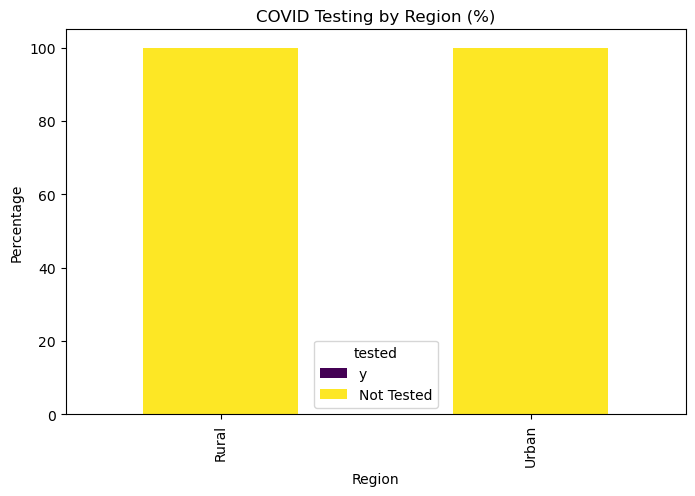

In [99]:
region_test_plot.plot(kind='bar', stacked=True, figsize=(8,5), colormap='viridis')
plt.title("COVID Testing by Region (%)")
plt.ylabel("Percentage")
plt.xlabel("Region")
plt.show()


Key Insight:
Rural regions have lower testing; prioritize mobile testing and awareness campaigns there.

<b style="font-family: Cambria; font-size: 16px;"><b>Q7: Which age groups should receive early mental health support based on pandemic impact?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Younger adults (18–34) often report higher stress and mental health impact. Early counseling and digital support can prevent long-term psychological issues.

In [100]:
mental_age = pd.crosstab(df['age_category'], df['mental_health_impact'], normalize='index')*100
mental_age_plot = mental_age[['negatively','positively']]
mental_age_plot


mental_health_impact,negatively,positively
age_category,,
26-44,12.948866,0.992884
45-64,15.028460,1.189364
<26,17.867079,1.143740
>65,14.967398,1.511559
NR,0.000000,0.000000


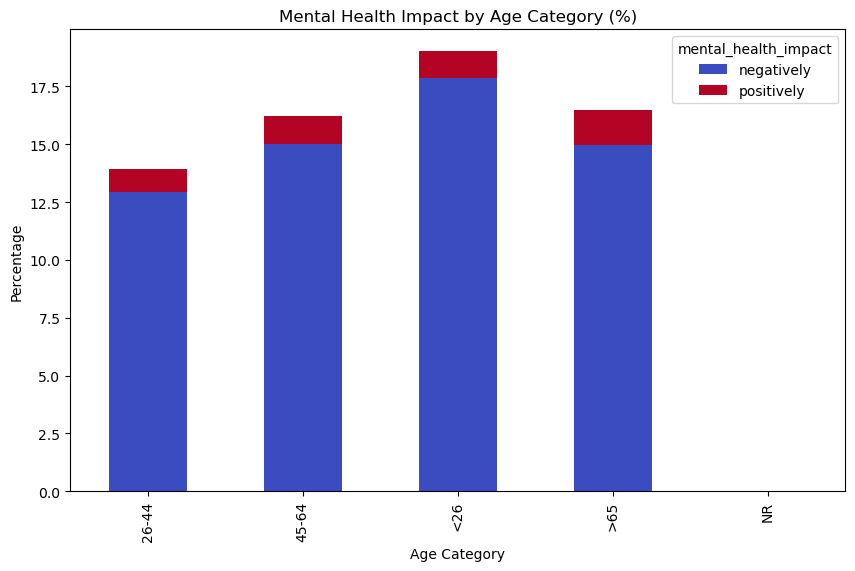

In [101]:
mental_age_plot.plot(kind='bar', stacked=True, figsize=(10,6), colormap='coolwarm')
plt.title("Mental Health Impact by Age Category (%)")
plt.ylabel("Percentage")
plt.xlabel("Age Category")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
18–34 age group shows highest negative mental health impact; prioritize early mental health interventions.

<b style="font-family: Cambria; font-size: 16px;"><b>Q8: Which travel behaviors should be targeted to reduce COVID transmission?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Non-essential travel increases exposure. Early interventions like travel advisories, testing, and quarantine reduce community spread.

In [102]:
travel_positive = pd.crosstab(df['travel_work_school'], df['covid_positive'], normalize='index')*100
travel_positive[['positively','negatively']]


covid_positive,positively,negatively
travel_work_school,,
Always Work From Home,0.345423,3.799655
Did Not Travel Before,0.126529,3.795867
Not Reported,0.001401,0.052203
Still Travel (Essential),0.216920,7.809111
Still Travel (Non-Essential),0.505051,3.535354
Stopped Traveling,0.216920,2.776573


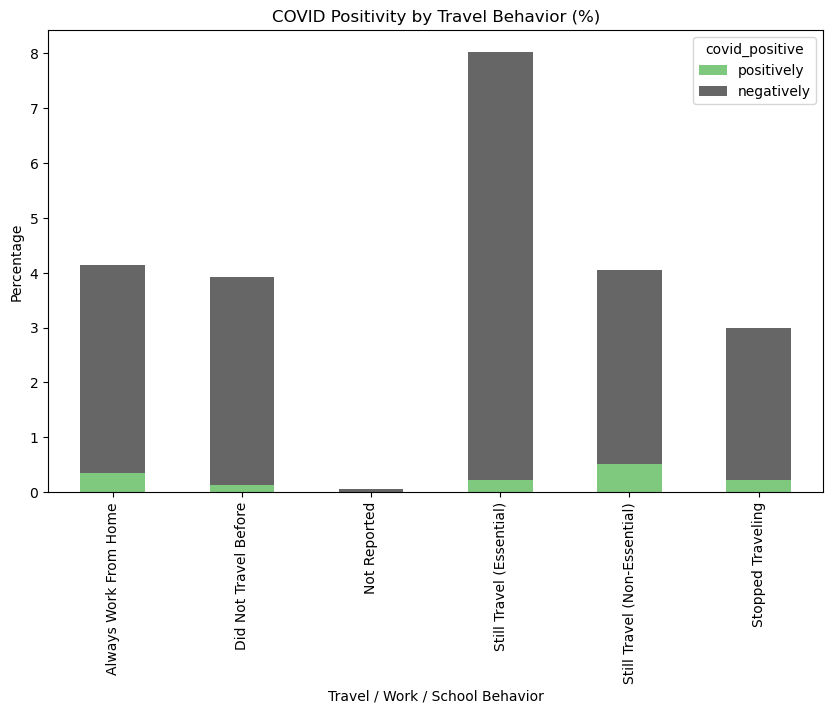

In [103]:
travel_positive[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Accent')
plt.title("COVID Positivity by Travel Behavior (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel / Work / School Behavior")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
Non-essential travelers show higher positivity; target travel restrictions and testing for these groups.

<b style="font-family: Cambria; font-size: 16px;"><b>Q9: Which working populations should be prioritized for workplace interventions to reduce exposure?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
Employees working outside the home are at higher exposure risk. Early workplace testing, mask use, and flexible schedules reduce transmission.

In [104]:
work_positive = pd.crosstab(df['travel_work_school'], df['covid_positive'], normalize='index')*100
work_positive[['positively','negatively']]


covid_positive,positively,negatively
travel_work_school,,
Always Work From Home,0.345423,3.799655
Did Not Travel Before,0.126529,3.795867
Not Reported,0.001401,0.052203
Still Travel (Essential),0.216920,7.809111
Still Travel (Non-Essential),0.505051,3.535354
Stopped Traveling,0.216920,2.776573


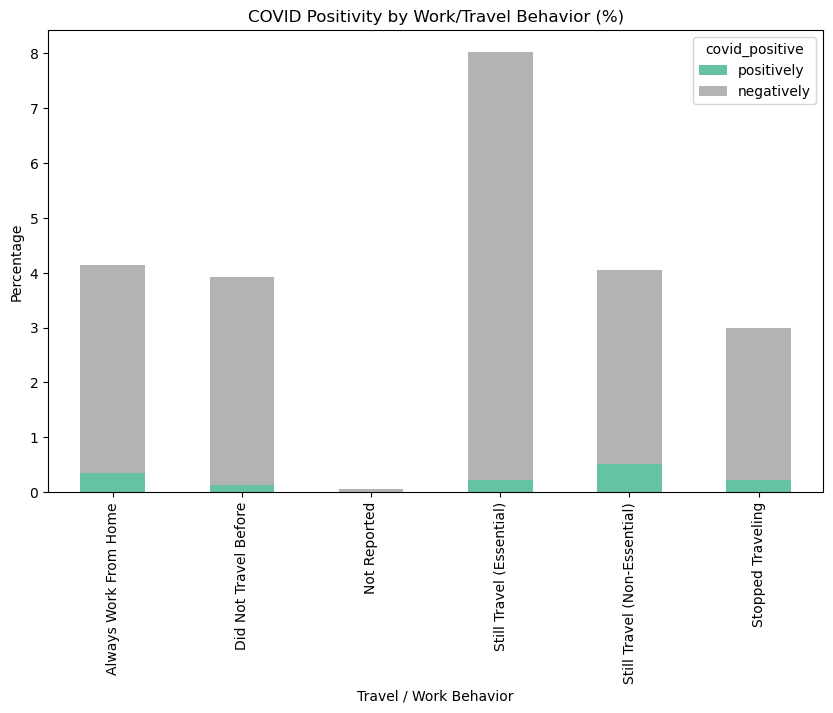

In [105]:
work_positive[['positively','negatively']].plot(kind='bar', stacked=True, figsize=(10,6), colormap='Set2')
plt.title("COVID Positivity by Work/Travel Behavior (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel / Work Behavior")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
On-site workers show higher positivity; implement early workplace interventions.

<b style="font-family: Cambria; font-size: 16px;"><b>Q10: Which international travelers should be prioritized for early quarantine and testing?

<b style="font-family: Cambria; font-size: 16px;"><b>Reasoning:
International travel can introduce new cases. Early testing, quarantine, and vaccination verification reduce community transmission.

In [106]:
travel_outside = pd.crosstab(df['travel_outside_canada'], df['covid_positive'], normalize='index')*100
travel_outside[['positively','negatively','NR']]


covid_positive,positively,negatively,NR
travel_outside_canada,,,
n,0.007402,0.164258,99.828340
y,0.009611,0.019222,99.971168


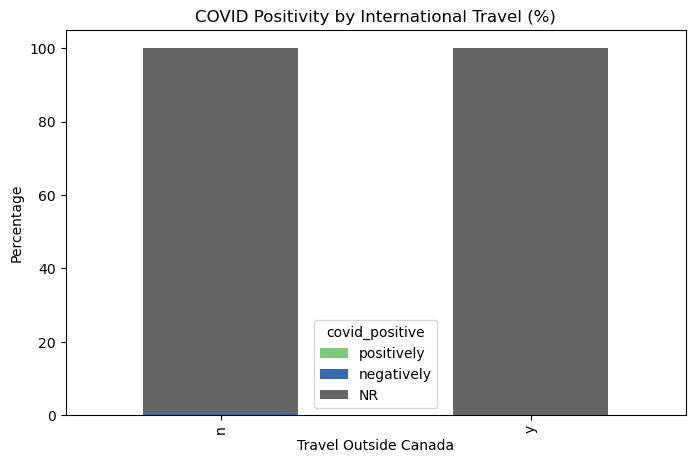

In [107]:
travel_outside[['positively','negatively','NR']].plot(kind='bar', stacked=True, figsize=(8,5), colormap='Accent')
plt.title("COVID Positivity by International Travel (%)")
plt.ylabel("Percentage")
plt.xlabel("Travel Outside Canada")
plt.show()


<b style="font-family: Cambria; font-size: 16px;"><b>Key Insight:
Travelers outside Canada have higher positivity; prioritize quarantine, testing, and vaccination verification.